In [20]:
import os
import pandas as pd
import numpy as np
import Data_Savior_J

DATAFILE_A = ['1Amar.txt', '1Apie.txt', '1Asen.txt', '2Amar.txt', '2Apie.txt', '2Asen.txt', '3Amar.txt', '3Apie.txt', 
            '3Asen.txt', '4Amar.txt', '4Apie.txt', '4Asen.txt', '5Amar.txt', '5Apie.txt', '5Asen.txt', '6Amar.txt', 
            '6Apie.txt', '6Asen.txt', '7Amar.txt', '7Apie.txt', '7Asen.txt', '8Amar.txt', '8Apie.txt', '8Asen.txt', 
            '9Amar.txt', '9Apie.txt', '9Asen.txt', '10Amar.txt', '10Apie.txt', '10Asen.txt', '11Amar.txt', '11Apie.txt', 
            '11Asen.txt']

DATAFILE_N = ['1Nmar.txt', '1Npie.txt', '1Nsen.txt', '2Nmar.txt', '2Npie.txt', '2Nsen.txt', '3Nmar.txt', 
            '3Npie.txt', '3Nsen.txt', '4Nmar.txt', '4Npie.txt', '4Nsen.txt', '5Nmar.txt', '5Npie.txt', '5Nsen.txt', 
            '6Nmar.txt', '6Npie.txt', '6Nsen.txt', '7Nmar.txt', '7Npie.txt', '7Nsen.txt', '8Nmar.txt', '8Npie.txt', 
            '8Nsen.txt', '9Nmar.txt', '9Npie.txt', '9Nsen.txt', '10Nmar.txt', '10Npie.txt', '10Nsen.txt', '11Nmar.txt', 
            '11Npie.txt', '11Nsen.txt']


$\Huge{\textbf{TEST 1}}$

In [189]:
def proccess_data(DATAFILE):
    
    datafile = os.path.join(DATADIR, DATAFILE)
    #datafile = DATAFILE

    # Remove header, Nan and trash
    data = np.genfromtxt(datafile, delimiter="	", skip_header=7, usecols=(0,1,2,3,4))
    mask = np.all(np.isnan(data) | np.equal(data, 0), axis=1)
    Xc = data[~mask]
    
    #Labeling the type of movement

    c1 = set('m')
    c2 = set('p')
    c3 = set('s')    

    if any((c in c1) for c in datafile): #March
        C = (np.ones(len(Xc))*0).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape((len(Xc),5)),C.reshape((len(Xc),1))))

    if any((c in c2) for c in datafile): # extenstion of the leg from sit position
        C = (np.ones(len(Xc))*1).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape((len(Xc),5)),C.reshape((len(Xc),1))))

    if any((c in c3) for c in datafile): # extenstion of the leg from sit position
        C = (np.ones(len(Xc))*2).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape((len(Xc),5)),C.reshape((len(Xc),1))))


    # Salving in file on the folder <classifier_data>
    from Data_Savior_J import save_it_now
    save_it_now(Xc, './preprocessed_data/'+DATAFILE[:len(DATAFILE)-3]+'data')
    print DATAFILE

In [190]:
DATAFILE_N = ['1Nmar.txt', '1Npie.txt', '1Nsen.txt']

for i in DATAFILE_N:
    DATADIR = 'N_TXT'
    proccess_data(i)

Saved to file
1Nmar.txt
Saved to file
1Npie.txt
Saved to file
1Nsen.txt


In [191]:
import numpy as np
from Data_Savior_J import load_file

Xc = load_file("preprocessed_data/1Nmar.data")

In [192]:
DATAFILE= ['1Npie.data', '1Nsen.data']

for i in DATAFILE:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i)))   

In [194]:
np.unique(Xc[:, 5:])

array([ 0.,  1.,  2.])

In [195]:
print 'Shape Xc rotulado ', Xc.shape
    
#Create temporal serie
NUM_SAMPLES = 16
NUM_COLS = Xc.shape[1]

new_Xc = np.array([])
for i in np.arange(NUM_SAMPLES - 1, Xc.shape[0]):
    x = Xc[i - (NUM_SAMPLES - 1) : i+1, :].ravel()
    if new_Xc.shape[0] == 0:
        new_Xc = x
    else:
        new_Xc = np.vstack((new_Xc, x))

y = new_Xc[1:, -1]
Xc = new_Xc[0:-1, :-1]

print 'Shape Xc serie-temporal ', Xc.shape
print 'Shape y serie-temporal ', y.shape

Shape Xc rotulado  (35501, 6)
Shape Xc serie-temporal  (35485, 95)
Shape y serie-temporal  (35485,)


In [183]:
np.unique(y)

array([ 0.,  1.,  2.])

In [184]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, 
                                                    random_state=10)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [186]:
print X_train_std.shape

(26562, 47)


In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 2.56 s, sys: 40 ms, total: 2.6 s
Wall time: 2.53 s

Predict time
CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 164 ms

ClassifyRF accuracy:---------->100.00 %


In [4]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['MP = 0', 'MP = 1', 'MP = 2'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'y_test' is not defined

$\Huge{\textbf{TEST 2 - The best attempt}}$

In [26]:
def proccess_data(DATAFILE):
    
    datafile = os.path.join(DATADIR, DATAFILE)
    #datafile = DATAFILE

    # Remove header, Nan and trash
    data = np.genfromtxt(datafile, delimiter="	", skip_header=7, usecols=(0,1,2,3,4))
    mask = np.all(np.isnan(data) | np.equal(data, 0), axis=1)
    Xc = data[~mask]
    
    print 'Xc cleaned shape ', Xc.shape
    
    #Create temporal serie
    NUM_SAMPLES = 16
    NUM_COLS = Xc.shape[1]

    new_Xc = np.array([])
    for i in np.arange(NUM_SAMPLES - 1, Xc.shape[0]):
        x = Xc[i - (NUM_SAMPLES - 1) : i+1, :].ravel()
        if new_Xc.shape[0] == 0:
            new_Xc = x
        else:
            new_Xc = np.vstack((new_Xc, x))
    
    Xc = new_Xc
    #y = new_Xc[1:, -1]
    #Xc = new_Xc[0:-1, :-1]
    
    print 'Xc temporal-serie shape ', Xc.shape
    
    #Labeling the type of movement

    c1 = set('m')
    c2 = set('p')
    c3 = set('s')    

    if any((c in c1) for c in datafile): #March
        C = (np.ones(len(Xc))*0).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))

    if any((c in c2) for c in datafile): # extenstion of the leg from sit position
        C = (np.ones(len(Xc))*1).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))

    if any((c in c3) for c in datafile): # extenstion of the leg from sit position
        C = (np.ones(len(Xc))*2).reshape((len(Xc),1))
        Xc = np.hstack((Xc.reshape(Xc.shape),C.reshape((len(Xc),1))))
    
    print 'Xc labeled shape ', Xc.shape

    # Salving in file on the folder <classifier_data>
    from Data_Savior_J import save_it_now
    save_it_now(Xc, './preprocessed_data/'+DATAFILE[:len(DATAFILE)-3]+'data')
    print DATAFILE[:len(DATAFILE)-3]+'data'

In [19]:
DATAFILE_N = ['1Nmar.txt', '1Npie.txt', '1Nsen.txt']

for i in DATAFILE_N:
    DATADIR = 'N_TXT'
    proccess_data(i)

Xc cleaned shape  (5681, 5)
Xc temporal-serie shape  (5666, 80)
Xc labeled shape  (5666, 81)
Saved to file
1Nmar.data
Xc cleaned shape  (14520, 5)
Xc temporal-serie shape  (14505, 80)
Xc labeled shape  (14505, 81)
Saved to file
1Npie.data
Xc cleaned shape  (15300, 5)
Xc temporal-serie shape  (15285, 80)
Xc labeled shape  (15285, 81)
Saved to file
1Nsen.data


In [6]:
import numpy as np
from Data_Savior_J import load_file

Xc = load_file("preprocessed_data/1Nmar.data")

In [7]:
DATAFILE= ['1Npie.data', '1Nsen.data']

for i in DATAFILE:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i)))  

In [8]:
X = Xc[:,0:(Xc.shape[1]-2)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))

X.shape, y.shape

((35456, 79), (35456,))

In [9]:
np.unique(y)

array([ 0.,  1.,  2.])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, 
                                                    random_state=10)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
print X_train_std.shape

(26592, 81)


# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 4.99 s, sys: 4 ms, total: 4.99 s
Wall time: 4.99 s

Predict time
CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 100 ms

ClassifyRF accuracy:---------->100.00 %


<IPython.core.display.Javascript object>


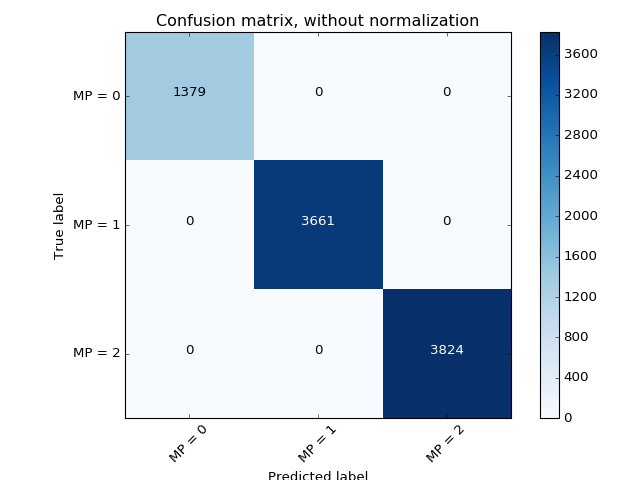

Confusion matrix, without normalization
[[1379    0    0]
 [   0 3661    0]
 [   0    0 3824]]


<IPython.core.display.Javascript object>


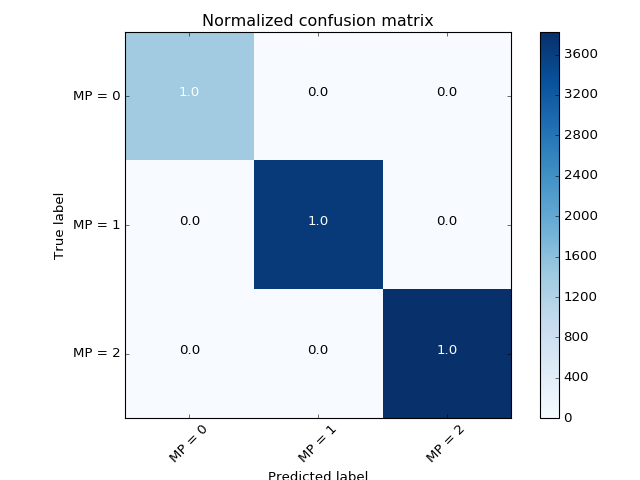

Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [14]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['MP = 0', 'MP = 1', 'MP = 2'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# SVM-RBF Classifier


In [15]:
from sklearn import svm, datasets

print 'Processing time RBF'
%time rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(
    X_train_std, y_train)
print ''

from sklearn.metrics import accuracy_score

def run_svm(svc, X_test_std, y_test):
    y_pred = svc.predict(X_test_std)
    from sklearn.metrics import accuracy_score
    print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

        
run_svm(rbf_svc, X_test_std, y_test)

Processing time RBF
CPU times: user 5min 33s, sys: 408 ms, total: 5min 34s
Wall time: 5min 34s



NameError: name 'poly_svc' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
class_names = np.array(['normal', 'stair ascent', 'stair descent'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()